In [1]:
import pandas as pd
pd.options.display.max_colwidth = 20
pd.options.display.max_rows = 4

In [2]:
df = pd.read_feather("s3://aq-dl/FinancialStatements/base.feather")
df

,cia_id,cia_nome,doc_id,doc_arq,doc_tp,doc_ver,doc_env,doc_ref,per_ini,per_fim,per_ref,dem_tp,conta_id,conta_fixa,conta_desc,conta_valor
0,3,CIA MODELO,54947,0000032016033130...,ITR,1,2016-04-02 12:04:12,2016-03-31,2016-01-01,2016-03-31,0,IND,3.01,1,Receita de Venda...,100000000.0
1,3,CIA MODELO,54947,0000032016033130...,ITR,1,2016-04-02 12:04:12,2016-03-31,2016-01-01,2016-03-31,0,IND,3.02,1,Custo dos Bens e...,-10000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10526336,26310,CIA. SECURITIZAD...,108527,0263102021063030...,ITR,1,2021-10-08 15:53:04,2021-06-30,2021-01-01,2021-06-30,0,IND,9.01.01,1,Ações Ordinárias...,5000.0
10526337,26310,CIA. SECURITIZAD...,108527,0263102021063030...,ITR,1,2021-10-08 15:53:04,2021-06-30,2021-01-01,2021-06-30,0,IND,9.01.03,1,Total de Ações (...,5000.0


In [8]:
df.query('doc_tp == "DFP"', inplace=True)
df

,cia_id,cia_nome,doc_id,doc_arq,doc_tp,doc_ver,doc_env,doc_ref,per_ini,per_fim,per_ref,dem_tp,conta_id,conta_fixa,conta_desc,conta_valor
171,94,PANATLANTICA S.A.,6094,0000942010123140...,DFP,1,2011-03-31 10:16:48,2010-12-31,2008-01-01,2008-12-31,-2,IND,1,1,Ativo Total,1.847500e+08
172,94,PANATLANTICA S.A.,6094,0000942010123140...,DFP,1,2011-03-31 10:16:48,2010-12-31,2008-01-01,2008-12-31,-2,CON,1,1,Ativo Total,2.045610e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10526038,21709,CIA MINEIRA DE A...,116844,0217092022033140...,DFP,1,2022-06-03 21:26:33,2022-03-31,2021-04-01,2022-03-31,0,IND,9.01.01,1,Ações Ordinárias...,1.258416e+09
10526039,21709,CIA MINEIRA DE A...,116844,0217092022033140...,DFP,1,2022-06-03 21:26:33,2022-03-31,2021-04-01,2022-03-31,0,IND,9.01.03,1,Total de Ações (...,1.258416e+09


In [6]:
# Núm. de DFPs
df.doc_id.nunique()

10473

<AxesSubplot:>

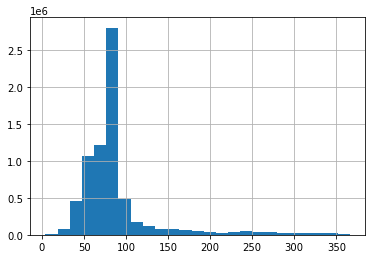

In [7]:
# O centésimo dia parece ser um dia de corte interessante, próximo da maioria das
# publicações, não deixando que as informações fiquem muito defasadas
df.doc_env.dt.dayofyear.hist(bins=25)